LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pathlib import Path
import torch
from torch import nn

import sys
sys.path.insert(0, '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes')

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
print(os.getcwd()) 

/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes


In [4]:
dir_path = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset"
data_path = os.chdir(dir_path)
print(os.listdir(data_path))

['8', '6', '1', '3', '5', '4', '7', '0', '2']


In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} csvs in '{dirpath}'.")


walk_through_dir(dir_path)

There are 9 directories and 0 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset'.
There are 0 directories and 81 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/8'.
There are 0 directories and 221 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/6'.
There are 0 directories and 129 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/1'.
There are 0 directories and 106 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/3'.
There are 0 directories and 450 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/5'.
There are 0 directories and 344 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/4'.
There are 0 directories and 15 csvs in '/mnt/drv01/alt.home/mark/pr

Gather all CSV paths

In [6]:
import glob

csv_paths = glob.glob(dir_path + '/**/*.csv', recursive=True)
print(f"Found {len(csv_paths)} CSVs.")


Found 1959 CSVs.


In [22]:
len(train_data)

1061

In [10]:
# print(cleaned_sample[0].head())

FEATURE EXTRACTION

⚠️ Skipped WELL-00003_20170514060000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170813030000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170821090300.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812220116.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812170025.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812120000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170914210000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170514110000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812070038.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170813080105.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170915170000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170813130131.csv: single positional index

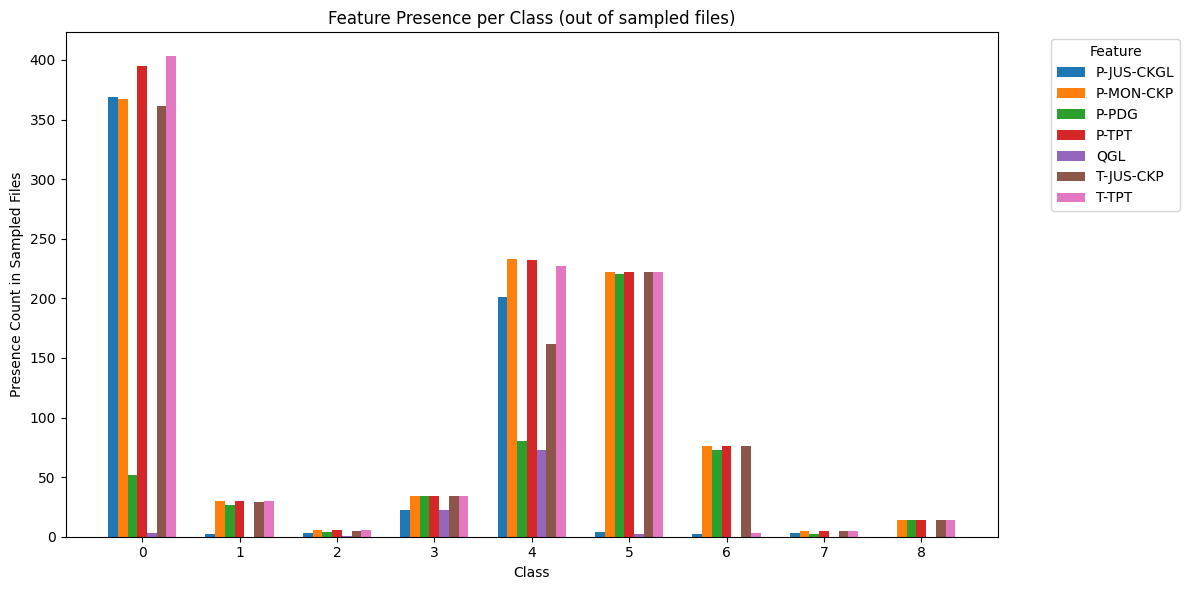

In [11]:
csv_dir = Path(r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split")
csv_files = list(csv_dir.glob("*.csv"))

from data_visualisation import variation

_ = variation(csv_files, n_samples=1061)


 All 20 random grid plots saved to '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/data_visualisation_figures'.


DATA PREPROCESSING

Data Cleaning

In [14]:
from data_cleaning import clean_with_peer_imputation


# Datasets
train_root = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split"

test_root = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/test_split"
val_root = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/val_split"

train_data_cleaned = clean_with_peer_imputation(train_root, n_peers=10, missing_threshold=3)
test_data_cleaned = clean_with_peer_imputation(test_root, n_peers=10, missing_threshold=3)
val_data_cleaned = clean_with_peer_imputation(val_root, n_peers=10, missing_threshold=3)

# for csv_file in train_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     train_data_cleaned.append(df_cleaned)

# for csv_file in test_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     test_data_cleaned.append(df_cleaned)


# for csv_file in val_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     val_data_cleaned.append(df_cleaned)

print(f"\n Cleaned {len(train_data_cleaned)} train, {len(test_data_cleaned)} test and {len(val_data_cleaned)} validation files. \n Each item is a cleaned DataFrame.")

/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detectio


 Cleaned 756 out of 1061 files.


/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detectio


 Cleaned 195 out of 275 files.


/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detectio


 Cleaned 192 out of 274 files.

 Cleaned 756 train, 195 test and 192 validation files. 
 Each item is a cleaned DataFrame.


In [15]:
random.choice(train_data_cleaned)

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,instance_label
0,2017-09-18 12:01:03.000000,24115950.0,14860340.0,54.92375,1359159.0,25.41169,19670290.0,0,1.252019,3,real
1,2017-09-18 12:01:04.000000,24116570.0,14861560.0,54.91988,1358326.0,25.41410,19670530.0,0,1.249556,3,real
2,2017-09-18 12:01:05.000000,24117190.0,14862510.0,54.91596,1357492.0,25.41652,19670770.0,0,1.247093,3,real
3,2017-09-18 12:01:06.000000,24117810.0,14863470.0,54.91204,1356659.0,25.41894,19671010.0,0,1.244630,3,real
4,2017-09-18 12:01:07.000000,24117810.0,14864270.0,54.90822,1356735.0,25.42136,19671250.0,0,1.242166,3,real
...,...,...,...,...,...,...,...,...,...,...,...
17933,2017-09-18 16:59:56.000000,24382280.0,15822940.0,43.76776,1198326.0,27.33628,19910410.0,0,1.338670,3,real
17934,2017-09-18 16:59:57.000000,24382430.0,15824130.0,43.76411,1198705.0,27.33604,19911130.0,0,1.334841,3,real
17935,2017-09-18 16:59:58.000000,24382590.0,15825330.0,43.76047,1199083.0,27.33581,19911860.0,0,1.331013,3,real
17936,2017-09-18 16:59:59.000000,24382970.0,15826210.0,43.75724,1199462.0,27.33557,19912590.0,0,1.331354,3,real


Data Normilazation

In [16]:
import sys
sys.path.insert(0, '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes')
from normalization import minmax_normalize, zscore_normalize

# Choose normalization method by name:
normalization_method = "minmax"  #"zscore"  or "minmax"

# Apply normalization to all cleaned DataFrames
train_data_clean_norm = []
test_data_clean_norm = []
val_data_clean_norm = []

# Normalize each DataFrame in the cleaned lists - train
for df in train_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    train_data_clean_norm.append(df_norm)

# Normalize each DataFrame in the cleaned lists - test
for df in test_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    test_data_clean_norm.append(df_norm)

# Normalize each DataFrame in the cleaned lists - val
for df in val_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    val_data_clean_norm.append(df_norm)

print(f"\n Normalized {len(train_data_clean_norm)} train {len(test_data_clean_norm)} test and {len(val_data_clean_norm)} files using '{normalization_method}' scaling.")


 Normalized 756 train 195 test and 192 files using 'minmax' scaling.


Anomally Division Visualisation

DATA LABELS

In [23]:
train_data_clean_norm[0]

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2017-05-06 22:01:03.000000,0.699388,0.247743,0.266325,1.000000,1.000000,0.884082,0.0,0.0,0
1,2017-05-06 22:01:04.000000,0.699387,0.251755,0.267606,0.999753,1.000000,0.884220,0.0,0.0,0
2,2017-05-06 22:01:05.000000,0.699386,0.255767,0.270166,0.999753,1.000000,0.884359,0.0,0.0,0
3,2017-05-06 22:01:06.000000,0.699386,0.259779,0.271447,0.999753,1.000000,0.884487,0.0,0.0,0
4,2017-05-06 22:01:07.000000,0.699387,0.263791,0.272727,0.999753,0.999543,0.884635,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
17933,2017-05-07 02:59:56.000000,1.000000,0.806419,0.948784,0.000247,0.000000,0.191133,0.0,0.0,0
17934,2017-05-07 02:59:57.000000,1.000000,0.808425,0.950064,0.000247,0.000000,0.191133,0.0,0.0,0
17935,2017-05-07 02:59:58.000000,1.000000,0.810431,0.952625,0.000000,0.000000,0.191142,0.0,0.0,0
17936,2017-05-07 02:59:59.000000,1.000000,0.812437,0.955186,0.000000,0.000000,0.191152,0.0,0.0,0


In [24]:
from class_labels import class_labels, anomally_classs

# Example call on one cleaned DataFrame
df = random.choice(train_data_clean_norm)
anomally_classs(df, class_col="class", class_labels=class_labels)

Last class 0: Normal


{np.int64(0): 'Normal'}

In [25]:
from data_label_split import split_X_y

X_train, y_train = split_X_y(train_data_clean_norm)

X_test, y_test = split_X_y(test_data_clean_norm)

X_val, y_val = split_X_y(val_data_clean_norm)

print(f"\n Extracted features: \n {len(X_train)} train files \n {len(X_test)} test files \n {len(X_val)} val files")

 DataFrame 1/756: X shape=(17938, 8), y=0
 DataFrame 2/756: X shape=(21600, 8), y=1
 DataFrame 3/756: X shape=(7121, 8), y=4
 DataFrame 4/756: X shape=(17710, 8), y=0
 DataFrame 5/756: X shape=(17899, 8), y=0
 DataFrame 6/756: X shape=(17947, 8), y=0
 DataFrame 7/756: X shape=(28799, 8), y=2
 DataFrame 8/756: X shape=(29299, 8), y=5
 DataFrame 9/756: X shape=(29299, 8), y=5
 DataFrame 10/756: X shape=(29299, 8), y=5
 DataFrame 11/756: X shape=(17924, 8), y=0
 DataFrame 12/756: X shape=(12021, 8), y=6.0
 DataFrame 13/756: X shape=(17959, 8), y=0
 DataFrame 14/756: X shape=(17874, 8), y=0
 DataFrame 15/756: X shape=(29299, 8), y=5
 DataFrame 16/756: X shape=(17962, 8), y=3
 DataFrame 17/756: X shape=(17898, 8), y=0
 DataFrame 18/756: X shape=(29299, 8), y=5
 DataFrame 19/756: X shape=(17826, 8), y=0
 DataFrame 20/756: X shape=(17810, 8), y=0
 DataFrame 21/756: X shape=(61999, 8), y=3
 DataFrame 22/756: X shape=(17962, 8), y=0
 DataFrame 23/756: X shape=(17475, 8), y=0
 DataFrame 24/756: 

In [26]:
X_train[0].shape, y_train[0].shape, X_val[0].shape, y_val[0].shape, X_test[0].shape, y_test[0].shape

((17938, 8), (), (17923, 8), (), (29299, 8), ())

In [27]:
print(f"Class: {random.choice(y_train)} =>> {class_labels[random.choice(y_train)]}") 

Class: 5 =>> Normal


CONVERTING DATA INTO TORCH TENSORS

1️⃣ Models — there’s no nn.Linear, nn.Conv2d, etc.

2️⃣ Automatic differentiation — no autograd to compute gradients.

3️⃣ Optimizers — no SGD, Adam, or other optimizers to update weights.

4️⃣ Loss functions — you’d have to code all losses (cross-entropy, MSE) manually.

5️⃣ GPU acceleration — NumPy is strictly CPU-bound.

6️⃣ Training loop infrastructure — PyTorch (or TensorFlow) provides all the tools to build modern training workflows.

Vertical Concanation(row-wise training) due to differences in the number of rows

In [28]:
# _rows = max(arr.shape[0] for arr in X_train)
# _rows

In [29]:
length = [arr.shape[0] for arr in X_train]
max_rows = int(np.percentile(length,90))
print(f"Max rows in X_train: {max_rows}")

Max rows in X_train: 29299


In [ ]:
from data_cleaning import padding

#max_rows = max(arr.shape[0] for arr in X_train)
max_rows = int(np.percentile(length,90))


#Train data padding
X_train_padded = padding(X_train, max_rows)

#Val data padding
X_val_padded = padding(X_val, max_rows)

# Test data padding
X_test_padded = padding(X_test, max_rows)

In [31]:
print(f" Sample data = {X_train_padded[0]} and its class is :{y_train[0]} => {class_labels[y_train[0]]}")

 Sample data = [[0.69938788 0.24774323 0.26632522 ... 0.88408216 0.         0.        ]
 [0.69938741 0.25175527 0.26760563 ... 0.8842204  0.         0.        ]
 [0.69938647 0.2557673  0.27016645 ... 0.88435865 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] and its class is :0 => Normal


In [32]:
X_train_padded[0].shape

(29299, 8)

In [33]:
for i, sample in enumerate(X_train_padded):
    if len(sample) != max_rows:
        print(f"Inconsistent length at index {i}: got {len(sample)}, expected {max_rows}")
print(f"All {len(X_train)} samples are consistent with {max_rows} rows")

All 756 samples are consistent with 29299 rows


In [34]:
len(X_train), len(X_train_padded)

(756, 756)

In [35]:
type(X_train_padded[0])

numpy.ndarray

In [36]:
from torch.utils.data import Dataset, DataLoader


class WellDataset(Dataset):
    def __init__(self, data_arrays, labels):
        """
        Args:
            data_arrays (List[np.ndarray]): each sample (n_rows, n_cols)
            labels      (List[int] or np.ndarray)
        """
        self.data   = data_arrays
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = self.data[idx].astype(np.float32)

        # ---- scrub NaN / +Inf / -Inf -----------------------------
        X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

        X_flat = X.reshape(-1)                      # (n_rows * n_cols,)
        y      = self.labels[idx]

        return torch.tensor(X_flat, dtype=torch.float32), \
               torch.tensor(y,       dtype=torch.long)


In [ ]:
BATCH_SIZE = 128

train_dataset = WellDataset(X_train_padded, y_train)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)
test_dataset = WellDataset(X_test_padded, y_test)
test_dataloader = DataLoader(test_dataset,
                                batch_size=BATCH_SIZE, 
                                shuffle=False)

val_dataset = WellDataset(X_val_padded, y_val)
val_dataloader = DataLoader(val_dataset,
                                batch_size=BATCH_SIZE, 
                                shuffle=False)

In [38]:
for X_batch, y_batch in train_dataloader:
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    print("batch_size, n_rows * n_cols")
    break  # Only check the first batch


X_batch shape: torch.Size([128, 234392])
y_batch shape: torch.Size([128])
batch_size, n_rows * n_cols


In [39]:
print(set(y_train))  # Must be {0, 1}


{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.float64(6.0), np.float64(7.0), np.int64(8)}


In [40]:
print(X_val_padded[0].shape)              # Should be (T, F)
print(X_val_padded[0].reshape(-1).shape)  # Should be (T × F,)


(29299, 8)
(234392,)


In [41]:
input_size = train_dataset[0][0].shape[0]
print(f"Input size: {input_size} (T × F)")

Input size: 234392 (T × F)


IMPORT MODELS

In [55]:
#Import the models
from MODELSSS import model_00
from MODELSSS import  model_01

# Input size
input_size = train_dataset[0][0].shape[0]

MODEL_0

In [56]:
#MODEL_00

trained_model_0, hist = model_00(train_dataloader, 
                                 val_dataloader, 
                                 input_size)

[Epoch 01/10] Train: loss 5.4478 | acc 67.06%   Val: loss 1.1919 | acc 92.71%
[Epoch 02/10] Train: loss 2.1717 | acc 91.67%   Val: loss 1.1569 | acc 92.19%
[Epoch 03/10] Train: loss 0.9619 | acc 93.78%   Val: loss 0.2843 | acc 97.92%
[Epoch 04/10] Train: loss 0.4134 | acc 94.97%   Val: loss 0.1184 | acc 97.92%
[Epoch 05/10] Train: loss 0.2855 | acc 94.97%   Val: loss 0.0948 | acc 98.96%
[Epoch 06/10] Train: loss 0.1584 | acc 96.16%   Val: loss 0.1368 | acc 97.40%
[Epoch 07/10] Train: loss 0.1499 | acc 95.63%   Val: loss 0.1668 | acc 97.40%
[Epoch 08/10] Train: loss 0.1297 | acc 96.30%   Val: loss 0.1622 | acc 97.92%
[Epoch 09/10] Train: loss 0.0768 | acc 97.35%   Val: loss 0.1472 | acc 97.92%
[Epoch 10/10] Train: loss 0.0921 | acc 97.49%   Val: loss 0.1384 | acc 97.92%


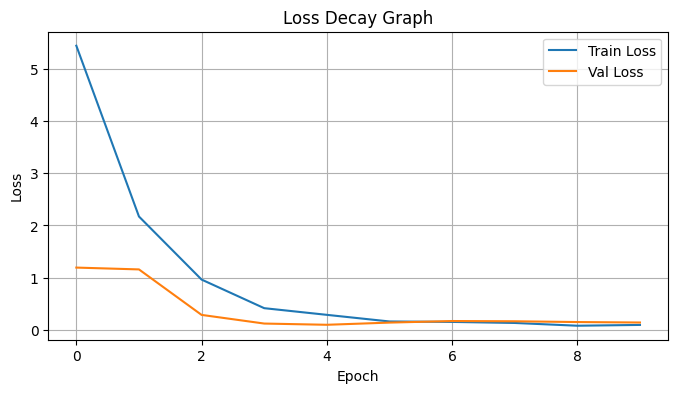

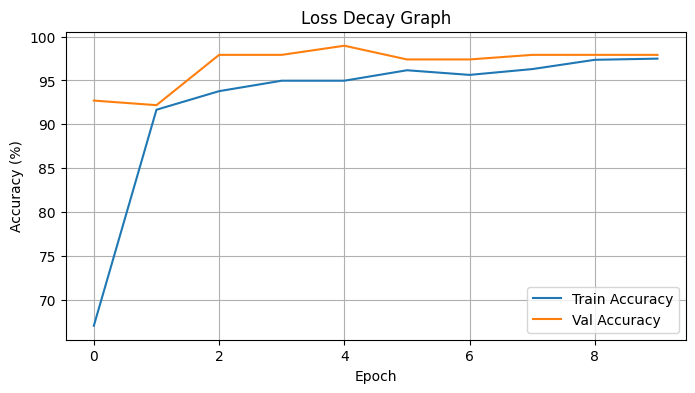

In [57]:
#MODLE_00

# ---- Plot Loss ----
plt.figure(figsize=(8, 4))
plt.plot(hist["train_loss"], label="Train Loss")
plt.plot(hist["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(8, 4))
plt.plot(hist["train_acc"], label="Train Accuracy")
plt.plot(hist["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)") 
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)  
plt.show()

In [44]:
from model_evaluation import evaluate_model

metrics = evaluate_model(
    y_true,
    y_pred,
    task_type="multiclass",
    average="macro"
)

print(metrics)


ModuleNotFoundError: No module named 'model_evaluation'

In [58]:
#MODEL_01

Learning_rate = 1e-3
No_of_epochs = 20

input_size = train_dataset[0][0].shape[0]   # after flattening
trained_model_1, hist_1 = model_01(
    train_loader     = train_dataloader,
    val_loader       = val_dataloader,
    input_size       = input_size,
    hidden_size      = 256,      
    lr               = Learning_rate,
    epochs           = No_of_epochs,
    num_classes      = 9         # adjust if different
)


[Epoch 01/20] Train: loss 1.9047 | acc 73.28%   Val: loss 1.0351 | acc 64.06%
[Epoch 02/20] Train: loss 1.2060 | acc 82.28%   Val: loss 0.6457 | acc 72.92%
[Epoch 03/20] Train: loss 0.8318 | acc 82.28%   Val: loss 0.4539 | acc 81.77%
[Epoch 04/20] Train: loss 0.5697 | acc 86.51%   Val: loss 0.3020 | acc 93.75%
[Epoch 05/20] Train: loss 0.3924 | acc 91.14%   Val: loss 0.2175 | acc 95.31%
[Epoch 06/20] Train: loss 0.3094 | acc 92.59%   Val: loss 0.1892 | acc 94.79%
[Epoch 07/20] Train: loss 0.2143 | acc 93.12%   Val: loss 0.1447 | acc 96.35%
[Epoch 08/20] Train: loss 0.1874 | acc 93.52%   Val: loss 0.1173 | acc 97.92%
[Epoch 09/20] Train: loss 0.1586 | acc 94.71%   Val: loss 0.1193 | acc 98.44%
[Epoch 10/20] Train: loss 0.1273 | acc 96.43%   Val: loss 0.0920 | acc 98.44%
[Epoch 11/20] Train: loss 0.1013 | acc 96.56%   Val: loss 0.0882 | acc 98.44%
[Epoch 12/20] Train: loss 0.0960 | acc 96.56%   Val: loss 0.0826 | acc 98.44%
[Epoch 13/20] Train: loss 0.0817 | acc 97.35%   Val: loss 0.0775

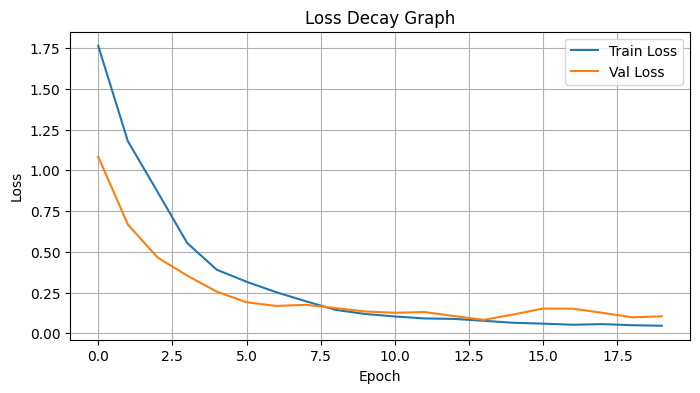

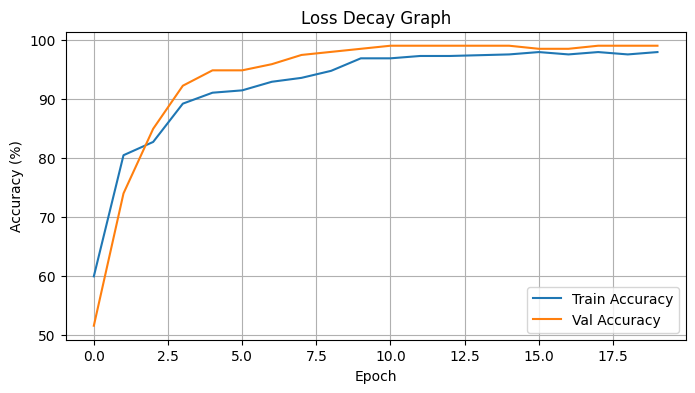

In [ ]:
##MODLE_01

# ---- Plot Loss ----
plt.figure(figsize=(8, 4))
plt.plot(hist_1["train_loss"], label="Train Loss")
plt.plot(hist_1["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(8, 4))
plt.plot(hist_1["train_acc"], label="Train Accuracy")
plt.plot(hist_1["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   
plt.show()


In [132]:
inputs, labels = next(iter(train_dataloader))
print("Has NaN in inputs? ", torch.isnan(inputs).any().item())
print("Max abs value     :", inputs.abs().max().item())
print("Label range       :", labels.min().item(), "→", labels.max().item())


Has NaN in inputs?  False
Max abs value     : 1.0
Label range       : 0 → 8


In [ ]:
trained_model_1.eval()
all_preds = []
all_labels = []

# Get device from model
device = next(trained_model_1.parameters()).device

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = trained_model_1(X_batch)
        _, preds = torch.max(outputs, 1)

        all_preds.append(preds)
        all_labels.append(y_batch)

# Concatenate and compute accuracy
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

accuracy = (all_preds == all_labels).float().mean()
print(f" Test Accuracy: {accuracy:.2%}")


 Test Accuracy: 97.44%


In [ ]:
# ---------- parameters ----------
k = 10                 # how many random samples
seed = None            # set e.g. 42 for reproducibility, or leave None

# ---------- choose random indices ----------
rng = np.random.default_rng(seed)
idx = rng.choice(len(X_test_padded), size=k, replace=False)   # unique indices

# ---------- fetch & flatten ----------
X_batch = [X_test_padded[i] for i in idx]      # list of (T,F) arrays
y_true  = [y_test[i]         for i in idx]     # list/array of ints

X_batch_flat = torch.stack([
    torch.tensor(sample.reshape(-1), dtype=torch.float32)
    for sample in X_batch
])

# ---------- run through the model ----------
device = next(trained_model_1.parameters()).device   # cpu or cuda
trained_model_1.eval()
with torch.no_grad():
    outputs = trained_model_1(X_batch_flat.to(device))
    y_pred = torch.argmax(outputs, dim=1).cpu().tolist()

# ---------- display results ----------
print(" idx │ true → pred")
print("─────┼────────────")
for i, (tid, t, p) in enumerate(zip(idx, y_true, y_pred)):
    print(f"{tid:4d} │  {t}   →  {p}")


 idx │ true → pred
─────┼────────────
   1 │  7   →  7
 101 │  4   →  0
 169 │  0   →  0
  41 │  5   →  5
   8 │  3   →  3
  25 │  5   →  5
  17 │  3   →  3
 166 │  0   →  0
  86 │  5   →  5
  19 │  3   →  3


CONFUSION MATRIX, LOSS FXN GRAPH 

In [ ]:
#  compute predictions (already on device)
trained_model_1.eval()
y_true_all, y_pred_all = [], []

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(next(trained_model_1.parameters()).device)
        preds = trained_model_1(X_batch).argmax(1).cpu()
        y_true_all.append(y_batch)
        y_pred_all.append(preds)

y_true_all = torch.cat(y_true_all).numpy()
y_pred_all = torch.cat(y_pred_all).numpy()

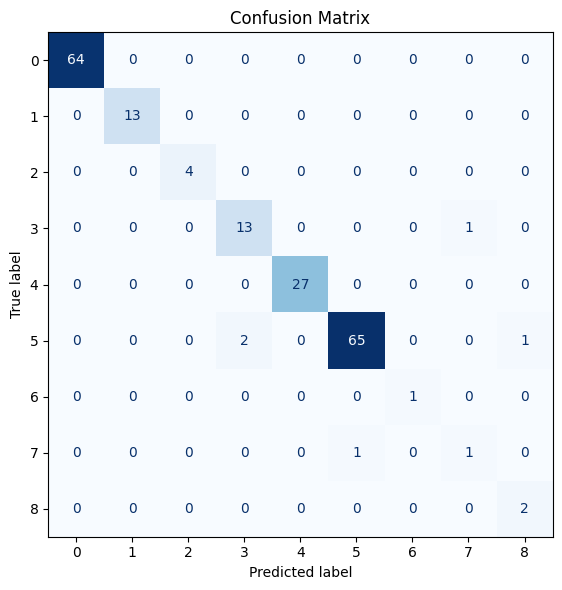

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

num_classes = len(np.unique(np.concatenate([y_true_all, y_pred_all])))
cm = confusion_matrix(y_true_all, y_pred_all, labels=np.arange(num_classes))

fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(num_classes))
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Example: all_preds and all_labels from model output
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=range(9), yticklabels=range(9))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.tight_layout()
plt.show()


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.